# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np #for matrix multiplication
%matplotlib inline

# Load the Dataset

In [2]:
df=pd.read_csv("IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Let's have a look on the shape of the dataset:

In [4]:
df.shape

(150, 5)

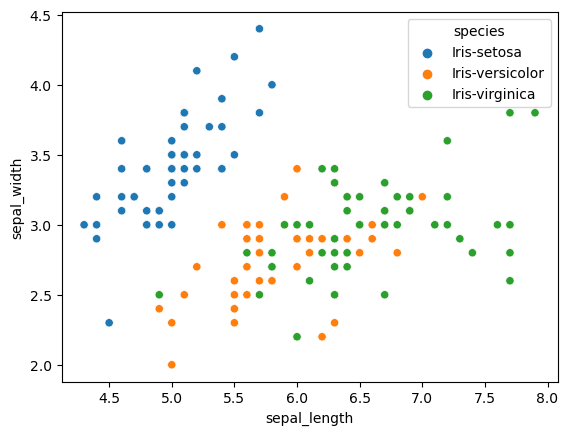

In [10]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width",hue="species")
plt.show()

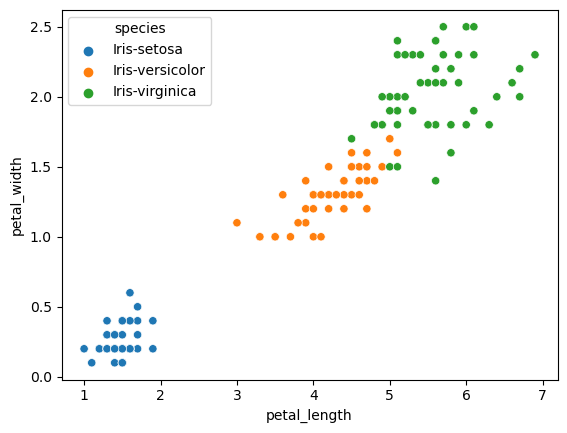

In [11]:
sns.scatterplot(data=df, x="petal_length", y="petal_width",hue="species")
plt.show()

# Preprocess and Data Normalization 

In [12]:
df["species"]=df["species"].replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})
label_name=["Iris-setosa","Iris-versicolor","Iris-virginica"]

# Split the training and target data 


In [13]:
#Lets make X and y in our Data:
X=df.drop(columns="species",axis=1)  #Training data 
y=df["species"]   #target data 

In [14]:
y.shape

(150,)

In [15]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

# Train_test_split the Data:

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
len(X_train)

120

In [18]:
len(X_test)

30

# Call, Train and Predict the Model:

# KNN Model

In [19]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score



In [20]:
# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)



In [21]:
# Fitting the model
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

# Predicting the Test set results

In [22]:
# Predicting the Test set results
pred1 = classifier.predict(X_test)
print(pred1)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


# The Actual (true) value 

In [23]:
print(y_test)

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: species, dtype: int64


# Evaluating KNN prediction Model

In [24]:
# Evaluating KNN prediction Model

accuracy = accuracy_score(y_test, pred1)
print('Accuracy of our KNN model is equal ',  accuracy)

Accuracy of our KNN model is equal  1.0


# Confusion Matrix 

In [25]:
#cf=confusion_matrix(y_test,pred1)
#sns.heatmap(cf,annot=True,fmt="d",cmap="hot",xticklabels=label_name,yticklabels=label_name)
#plt.title('Confusion Matrix')
#plt.xlabel('Predicted labels')
#plt.ylabel('True labels')
#plt.show()

# Classification Report 

In [26]:
print(classification_report(y_test,pred1,target_names=label_name))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Create SVM Model

In [29]:
from sklearn.svm import SVC # support vector classifier 
# also : SVR:  support vector regressor

In [46]:
# Create a kernel support vector machine model
svm_model = SVC(kernel='rbf', gamma=5, C=10.0)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Evaluate the model on the test data
pred2=svm_model.predict(X_test)
print(f"Accuracy Score : {accuracy_score(y_test,pred2)}")

Accuracy Score : 0.9666666666666667


# confusion matrix

In [47]:

#cf=confusion_matrix(y_test,pred2)
#sns.heatmap(cf,annot=True,fmt="d",cmap="hot",xticklabels=label_name,yticklabels=label_name)
#plt.title('Confusion Matrix')
#plt.xlabel('Predicted labels')
#plt.ylabel('True labels')
#plt.show()

# classification report

In [48]:
print(classification_report(y_test,pred2,target_names=label_name))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



# Decsion Tree

In [49]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

In [50]:
# Defining an object for DTC and fitting for train dataset
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1 )
dt.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)

[Text(0.375, 0.875, 'x[3] <= 0.292\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 0.636\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.25, 0.375, 'x[1] <= 0.229\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.125, 0.125, 'gini = 0.165\nsamples = 11\nvalue = [0, 10, 1]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.75, 0.375, 'x[2] <= 0.686\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.625, 0.125, 'gini = 0.463\nsamples = 11\nvalue = [0, 4, 7]'),
 Text(0.875, 0.125, 'gini = 0.061\nsamples = 32\nvalue = [0, 1, 31]')]

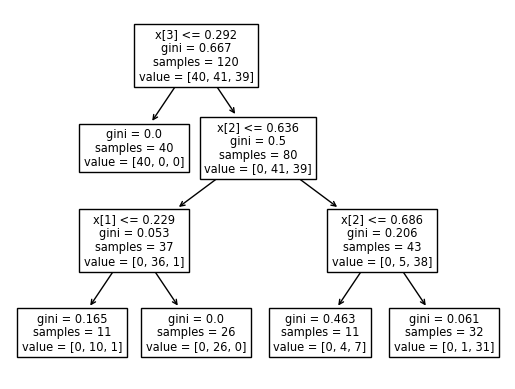

In [51]:
from sklearn import tree
tree.plot_tree(dt)

In [52]:
y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

In [53]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  0.95
Accuracy of Decision Tree-Test:  0.9666666666666667


In [54]:
#Classification for test before hyperparameter tuning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# Random forest model

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=4)  #by changing the number of estimators or tree we can imporve the perfromance
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=4)

In [56]:
#prediction of unseen data
pred3=rf_model.predict(X_test)
print(f"Accuracy Score : {accuracy_score(y_test,pred3)}")

Accuracy Score : 1.0


In [57]:
#prediction of unseen data

print("the predicted values are:", pred3)

the predicted values are: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


# Confusion matrix

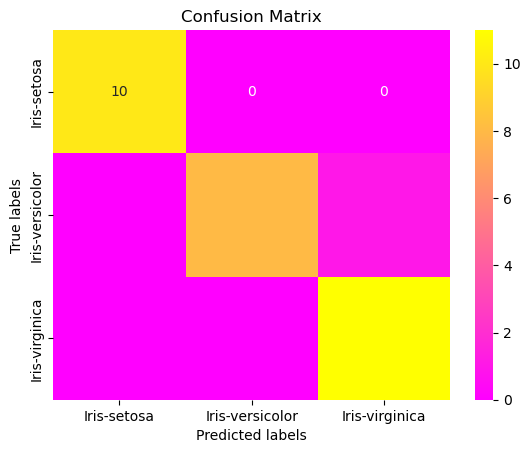

In [58]:
cf=confusion_matrix(y_test,pred2)
sns.heatmap(cf,annot=True,fmt="d",cmap="spring",xticklabels=label_name,yticklabels=label_name)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Classification report

In [59]:
print(classification_report(y_test,pred3,target_names=label_name))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

